# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

## 1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline
import sympy as sp
import pandas as pd

Text(0.5, 1.0, 'Función')

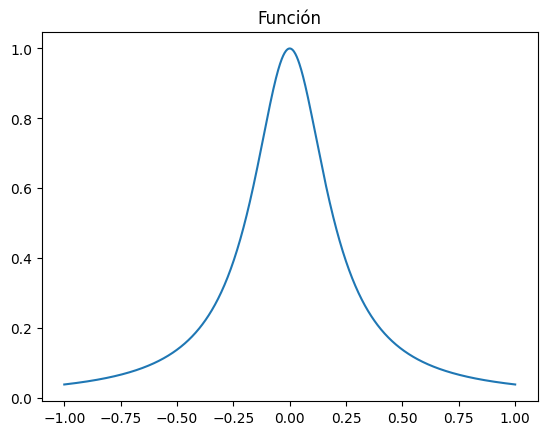

In [3]:
#a
f=lambda x: 1/(1+25*x**2)
x=np.linspace(-1,1,1000)

plt.plot(x,f(x))
plt.title('Función')

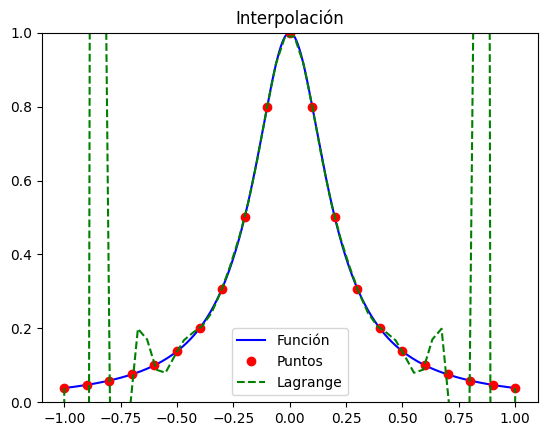

In [4]:
N=20
n=N+1
x_=np.linspace(-1,1,n)

pl=lagrange(x_,f(x_))

xl=np.linspace(np.min(x_),np.max(x_))

plt.plot(x,f(x),'b-',label='Función')
plt.plot(x_,f(x_),'ro',label='Puntos')
plt.plot(xl,pl(xl),'g--',label='Lagrange')
plt.title('Interpolación')
plt.ylim(0,1)
plt.legend()

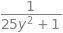

In [5]:
#b
sp.init_printing()

f_s=lambda y: 1/(1+25*y**2)

y=sp.Symbol('y')
f_s(y)

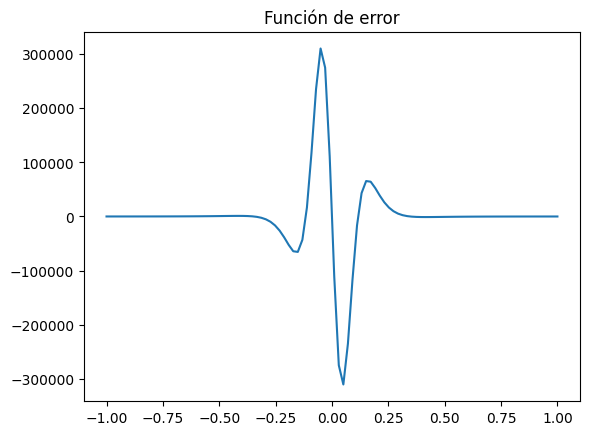

In [6]:
df5=sp.diff(f_s(y),y,5)
f5=sp.lambdify(y,df5,'numpy') #para poder evaluar la función

x5=np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
plt.title('Función de error')

xmax=np.max(abs(f5(x5))) #f(max)
xzeta=np.argmax(abs(f5(x5)))
x5[xzeta] #max

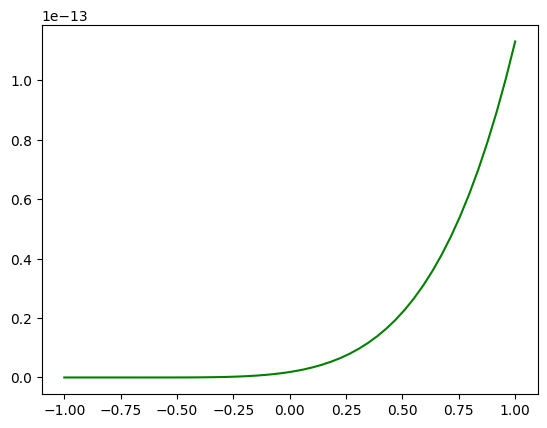

In [7]:
from math import factorial
#plt.plot(x_,f(x_),'ro')
plt.plot(xl,(xmax/factorial(n))*(xl-x_[0])*(xl-x_[1])*(xl-x_[2])*(xl-x_[3])*(xl-x_[4]),'g-')

## 2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

Text(0.5, 1.0, 'Función')

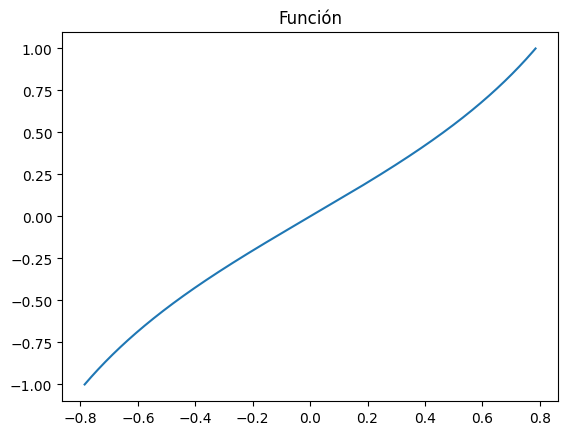

In [8]:
f=lambda x: np.tan(x)
x=np.linspace(-np.pi/4,np.pi/4,1000)

plt.plot(x,f(x))
plt.title('Función')

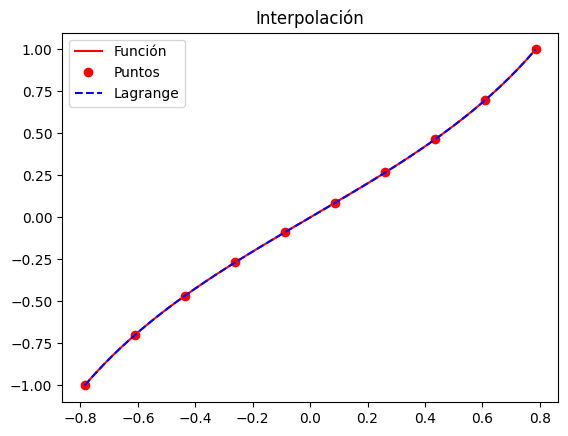

In [9]:
N=9
n=N+1
x_=np.linspace(-np.pi/4,np.pi/4,n)

pl=lagrange(x_,f(x_))       #coeficientes asociados

xl=np.linspace(np.min(x_),np.max(x_))

plt.plot(x,f(x),'r-',label='Función')
plt.plot(x_,f(x_),'ro',label='Puntos')
plt.plot(xl,pl(xl),'b--',label='Lagrange')
plt.title('Interpolación')
plt.legend()

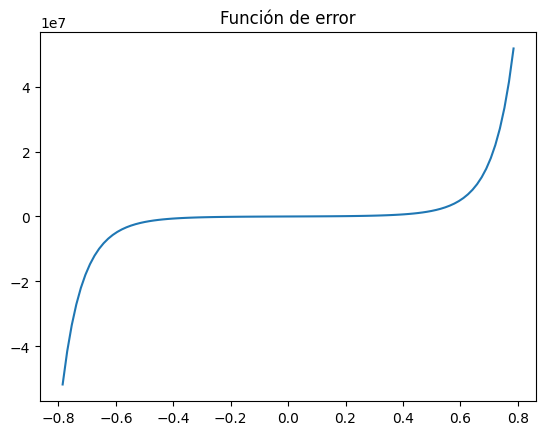

In [10]:
f_s=lambda y: sp.tan(y)

y=sp.Symbol('y')
f_s(y)

df10=sp.diff(f_s(y),y,10)
f10=sp.lambdify(y,df10,'numpy') #para poder evaluar la función

x10=np.linspace(-np.pi/4,np.pi/4,100)
plt.plot(x10,f10(x10))
plt.title('Función de error')

xmax=np.max(abs(f10(x10))) #f(max)
xzeta=np.argmax(abs(f10(x10)))
x10[xzeta] #max

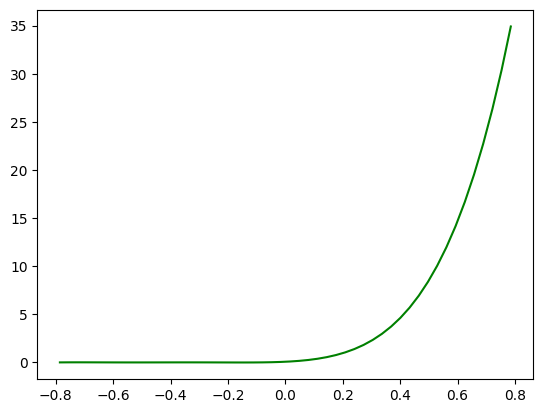

In [11]:
plt.plot(xl,(xmax/factorial(n))*(xl-x_[0])*(xl-x_[1])*(xl-x_[2])*(xl-x_[3])*(xl-x_[4]),'g-')

## 3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


,x,f(x)
0,1.0,0.765198
1,1.3,0.620086
2,1.6,0.455402
3,1.9,0.281819
4,2.2,0.110362


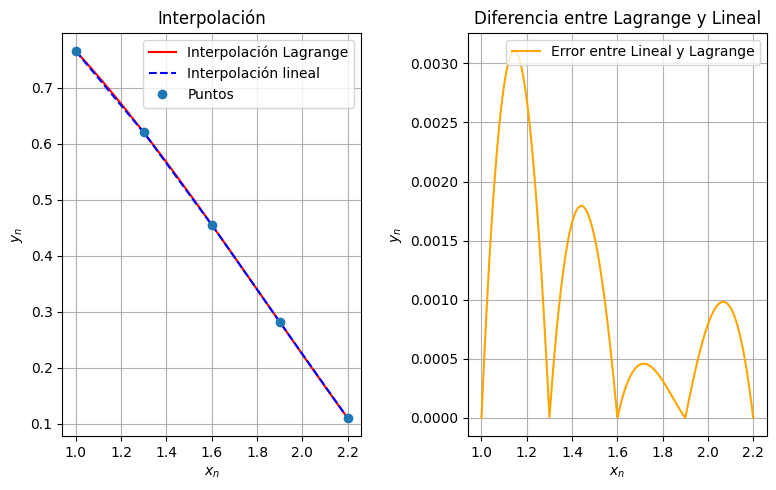

In [104]:
x=np.array([1,1.3,1.6,1.9,2.2])
fx=np.array([0.7651977,0.6200860,0.4554022,0.2818186,0.1103623])

df=pd.DataFrame({'x':x,'f(x)':fx})

PL=lagrange(x,fx)
XL=np.linspace(1,2.2,1000)

xlin=np.linspace(np.min(x),np.max(x),1000)
ylin=np.interp(xlin,x,fx)

fig,axes=plt.subplots(1,2,figsize=(8,5))

axes[0].plot(XL,PL(XL),'r-',label='Interpolación Lagrange')
axes[0].plot(xlin,ylin,'b--',label='Interpolación lineal')
axes[0].plot(x,fx,'o',label='Puntos')
axes[0].set_title('Interpolación')
axes[0].set_xlabel('$x_n$')
axes[0].set_ylabel('$y_n$')
axes[0].grid()
axes[0].legend()

dif=np.zeros(len(xlin))
for i in range(len(dif)):
    dif[i]=abs(PL(XL[i])-ylin[i])

axes[1].plot(xlin,dif,'orange',label='Error entre Lineal y Lagrange')
axes[1].set_title('Diferencia entre Lagrange y Lineal')
axes[1].set_xlabel('$x_n$')
axes[1].set_ylabel('$y_n$')
axes[1].grid()
axes[1].legend()

plt.tight_layout()
df

A simple vista se ven muy similares, pero a la hora de analizar exhaustivamente las diferencias tenemos que entre los métodos de interpolación lineal y de Lagrange, se observa que hay una diferencia de hasta el orden de 1e-3.

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

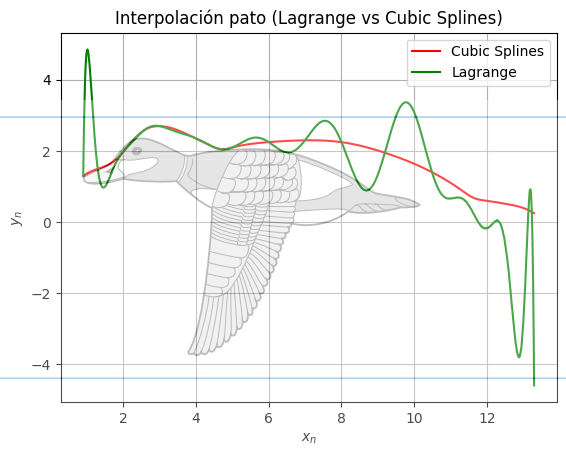

In [110]:
palx=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
paly=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

pol=lagrange(palx,paly)
xl=np.linspace(np.min(palx),np.max(palx),1000)

cub=CubicSpline(palx,paly)

plt.plot(xl,cub(xl),'r-',label='Cubic Splines')
plt.plot(xl,pol(xl),'g-',label='Lagrange')
plt.title('Interpolación pato (Lagrange vs Cubic Splines)')
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.grid()
plt.legend()

image=plt.imread('paloma.png')

plt.figimage(image,xo=-250,yo=-110,alpha=0.3)
#plt.figimage(image,alpha=0.3)

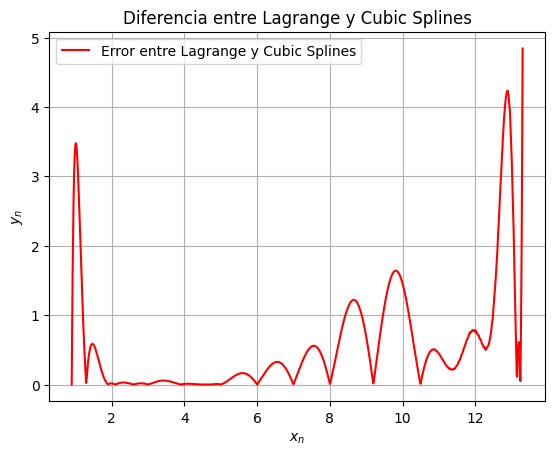

In [108]:
diff=np.zeros(len(xl))
for i in range(len(diff)):
    diff[i]=abs(pol(xl[i])-cub(xl)[i])

plt.plot(xl,diff,'r-',label='Error entre Lagrange y Cubic Splines')
plt.title('Diferencia entre Lagrange y Cubic Splines')
plt.xlabel('$x_n$')
plt.ylabel('$y_n$')
plt.grid()
plt.legend()